# Bayesian network

In [3]:
import pandas as pd 

# Reading in data 

df = pd.read_csv('./Ordinal Encoded with Scaling (remember to imbalance check in each model).csv')  

df2 = df.drop(columns=['Your level of satisfaction in Online Education'])

df2.head(5) 

,Unnamed: 0,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,...,Sleep time (Hours),Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online
0,0,0.826081,0.722049,0.486024,-0.562497,1.411598,-0.581565,-0.270233,-0.334392,1.378125,...,-0.716130,-0.880700,-1.088087,-1.196072,-0.822769,1.244915,-1.747111,-1.576433,0.128714,-0.362683
1,1,0.826081,0.722049,0.486024,-0.249763,-0.012407,-0.581565,-0.270233,-0.334392,-2.522158,...,-1.471761,-0.880700,0.919045,0.836070,-0.822769,1.244915,-1.747111,-1.576433,1.458326,-1.925901
2,2,0.826081,-1.384947,0.486024,-0.562497,-0.724409,-0.581565,-0.270233,0.474571,-1.547087,...,0.039501,-0.880700,-1.088087,0.836070,-0.822769,-0.165943,-1.747111,-1.576433,-1.200899,-0.362683
3,3,0.826081,0.722049,0.486024,-0.562497,-0.724409,-0.581565,-0.270233,-0.334392,0.403054,...,-0.716130,-0.342697,-1.088087,-1.196072,1.215409,1.244915,-1.747111,-0.716636,1.458326,-1.404828
4,4,0.826081,-1.384947,0.486024,-0.562497,-0.724409,-0.581565,-0.270233,-0.334392,-0.572016,...,0.039501,-0.342697,0.919045,0.836070,1.215409,0.539486,0.063085,0.143161,-1.200899,-0.362683


In [4]:
# Splitting data in training and testing set 
from sklearn.model_selection import train_test_split 

target = df['Your level of satisfaction in Online Education']  

X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2, random_state=0)   


### Gaussian NB

In [5]:
# Encoding 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn import preprocessing  

model = GaussianNB()

model.fit(X_train, y_train) 

print(classification_report(y_test, model.predict(X_test)))



              precision    recall  f1-score   support

           0       0.64      0.81      0.72       105
           1       0.53      0.59      0.56        39
           2       0.75      0.38      0.51        63

    accuracy                           0.64       207
   macro avg       0.64      0.59      0.59       207
weighted avg       0.66      0.64      0.62       207



### Confusion Matrix

In [6]:
from sklearn.metrics import confusion_matrix  

cf_matrix = confusion_matrix(y_test,model.predict(X_test))
print(cf_matrix) 

[[85 14  6]
 [14 23  2]
 [33  6 24]]


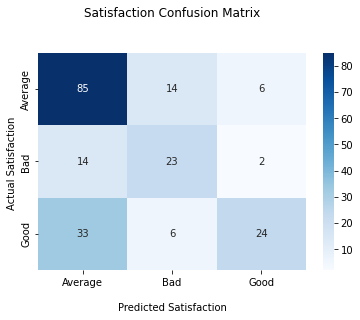

In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from matplotlib import rcParams

cf_matrix_vs = sns.heatmap(cf_matrix, annot=True, cmap='Blues') 


cf_matrix_vs.set_title('Satisfaction Confusion Matrix\n\n')
cf_matrix_vs.set_xlabel('\nPredicted Satisfaction')
cf_matrix_vs.set_ylabel('Actual Satisfaction ') 


cf_matrix_vs.xaxis.set_ticklabels(['Average','Bad', 'Good'])
cf_matrix_vs.yaxis.set_ticklabels(['Average','Bad', 'Good'])

# figure size in inches
rcParams['figure.figsize'] = 10,16

plt.show()

## Over-Sample

In [8]:
from sklearn.svm import SVC  
import numpy as np 

clf_linear = SVC(kernel='linear')  
clf_rbf = SVC(kernel= 'rbf')  
clf_poly = SVC(kernel= 'poly') 
clf_sig = SVC(kernel= 'sigmoid')

clf_linear.fit(X_train, np.asarray(y_train))  
clf_rbf.fit(X_train, np.asarray(y_train))   
clf_poly.fit(X_train, np.asarray(y_train))
clf_sig.fit(X_train, np.asarray(y_train))  

print('##### SVC with linear kernel #####')
print(classification_report(y_test, clf_linear.predict(X_test)), '\n')  

print('##### SVC with rbf kernel #####')
print(classification_report(y_test, clf_rbf.predict(X_test)), '\n')  

print('##### SVC with poly kernel #####')
print(classification_report(y_test, clf_poly.predict(X_test)), '\n')  

print('##### SVC with sigmoid kernel #####')
print(classification_report(y_test, clf_sig.predict(X_test)), '\n') 



##### SVC with linear kernel #####
              precision    recall  f1-score   support

           0       0.61      0.90      0.72       105
           1       0.56      0.38      0.45        39
           2       0.88      0.35      0.50        63

    accuracy                           0.63       207
   macro avg       0.68      0.54      0.56       207
weighted avg       0.68      0.63      0.60       207
 

##### SVC with rbf kernel #####
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       105
           1       0.00      0.00      0.00        39
           2       0.00      0.00      0.00        63

    accuracy                           0.51       207
   macro avg       0.17      0.33      0.22       207
weighted avg       0.26      0.51      0.34       207
 

##### SVC with poly kernel #####
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       105
           1       0.00  

/Users/andrewnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andrewnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andrewnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)